# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    max_t = 100
    for t in range(max_t):
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.09000000171363354
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.09000000171363354
Score (max over agents) from episode 5: 0.10000000149011612


### 4. Algorithm

In this notebook, the agents were trained using the MADDPG algorithm as described in [this paper](https://arxiv.org/abs/1706.02275). Details of the implementation are as follows:

* **Neural network architectures**  

    The Actor(policy) network architecture is a multilayer perceptron (MLP) network with 2 hidden fully connected (fc) layers and 2 batch norm layers. The 1st fc layer had 128 units and the 2nd fc layer had 64 units. Relu was used as activation function after each fc layer. The batch norm layers were placed after each relu activation function. The final output layer used a tanh layer to bound the actions.

    The Critic(value) network architecture is also a multilayer perceptron (MLP) network with 2 hidden fc layers and 1 batch norm layer. The batch norm layer was placed right after the input layer (state vectors from all agents) and before the 1st fc layer. The 1st fc layer had 128 units. Then, full actions vector (from all agents) were concatenated with the output of the 1st fc layer to feed into the 2nd fc layer. The 2nd fc layer had 64 units. Relu was used as activation function after each hidden layer. The final output layer has a single unit.

    The final layer weights of both the actor and critic network were initialized from a uniform distribution [-3e-3, 3e-3]. This was to ensure the initial outputs for the policy and value estimates were near zero. The other layers were initialized from uniform distributions [-1/sqrt(f), 1/sqrt(f)], where f is the number of input units of the layer.  


* **Hyperparameter**
    * Experience replay buffer size = 1e6
    * Minibatch size = 256
    * Discount factor = 0.99
    * Soft update parameter $\tau$ = 5e-2              
    * Actor learning rate = 1e-3         
    * Critic learning rate = 1e-3         
    * L2 weight decay rate = 0         
    * Update the networks 4 times for every 4 timesteps
    * Start learning only after at least 5000 experiences have been collected 
    
    
* **Important differences between MADDPG and DDPG**
    - **DDPG agents use shared actor (policy) and critic function (value function)**  
    In naive DDPG, all agents uses a single actor and critic function, i.e. all agents' actor and critic neural networks have the same weights. While each MADDPG agent has its own actor and critic neural networks and does not share the weight parameters.
    
    - **MADDPG uses state and action info from all agents**    
    MADDPG's critic function uses state and action vectors from all agent as input but the actor function only uses individual agent's state vector. Naive DDPG agents do not consider interactions with other agents. 
    
    - **MADDPG agent re-uses its own experience in memory storage**  
    In naive DDPG, all experience samples are pooled together (as shared experiences) and used for traing without regard to which agent has generated it. While in MADDPG, during training, each agent only uses its own state vector as input to generate actions (although the critic function uses all agents' state and action vectors as input).  

### 5. Experiments and results

In [7]:
# Instantiate the Environment and Agent
from maddpg import Agent

agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size, seed=0)
env_info = env.reset(train_mode=True)[brain_name]

### 5a.Train the Agent with MADDPG

Episode 200	Average Score: 0.01	Time lapsed: 0.1min
Episode 400	Average Score: 0.04	Time lapsed: 1.3min
Episode 600	Average Score: 0.08	Time lapsed: 4.4min
Episode 800	Average Score: 0.11	Time lapsed: 9.1min
Episode 1000	Average Score: 0.21	Time lapsed: 16.3min
Episode 1200	Average Score: 0.25	Time lapsed: 27.0min
Episode 1400	Average Score: 0.38	Time lapsed: 42.5min
Episode 1600	Average Score: 0.42	Time lapsed: 61.6min
Episode 1800	Average Score: 0.56	Time lapsed: 85.1min
Episode 1875	Average Score: 0.71	Time lapsed: 98.3min
Environment solved in 1775 episodes!	Average Score: 0.71


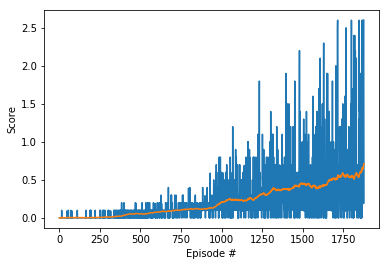

In [8]:
import torch
import numpy as np
from time import time
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

def maddpg_trainer(n_episodes=2000, max_t=1000, print_every=200):
    """MADDPG trainer
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        print_every (int): print scores every 'print_every' episodes
    """
    final_scores = []                        # list containing final scores from each episode
    final_scores_window = deque(maxlen=100)  # last 100 scores
    final_scores_window_avg = []             # avg of the final_scores_window
    t1 = time()
    for i_episode in range(1, n_episodes+1):
        agent.reset()
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        states = env_info.vector_observations 
        scores = np.zeros(num_agents)
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations   # get the next states
            rewards = env_info.rewards                   # get the rewards
            dones = env_info.local_done 
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            scores += rewards
            if all(dones):
                break 
        final_scores_window.append(np.max(scores))       # save most recent scores
        final_scores.append(np.max(scores))              # save most recent scores
        final_scores_window_avg.append(np.mean(final_scores_window)) # save most recent avg scores
        t2 = (time()-t1)/60
        print('\rEpisode {}\tAverage Score: {:.2f}\tTime lapsed: {:.1f}min'.format(i_episode, np.mean(final_scores_window), t2), end="")
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tTime lapsed: {:.1f}min'.format(i_episode, np.mean(final_scores_window), t2))
        if final_scores_window_avg[-1] >= 0.7:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(final_scores_window)))
            agent.save_model()
            break
    return final_scores, final_scores_window_avg


final_scores, final_scores_avg = maddpg_trainer()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(final_scores)+1), final_scores)
plt.plot(np.arange(1, len(final_scores)+1), final_scores_avg)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

###  5b. Evaluate the trained Agent

In [11]:
# load the weights from file
agent = Agent(num_agents=num_agents, state_size=state_size, action_size=action_size, seed=0)
agent.load_model()

# play 5 episodes by the ddpg trained agent
for i in range(5):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    states = env_info.vector_observations            # get the current state
    scores = np.zeros(num_agents)                   # initialize the score
    max_t = 1000
    for t in range(max_t):
        actions = agent.act(states)                      # select actions
        env_info = env.step(actions)[brain_name]        # send the actions to the environment
        next_states = env_info.vector_observations   # get the next states
        rewards = env_info.rewards                   # get the rewards
        dones = env_info.local_done                  # see if episodes have finished
        scores += rewards                                # update the scores
        states = next_states                             # roll over the states to next time step
        if all(dones):                                       # exit loop if all episodes finished
            break
    print("Episode: {}\tScores: {}\tMax score: {}".format(i, scores, np.max(scores)))

Episode: 0	Scores: [1.40000002 1.29000002]	Max score: 1.4000000208616257
Episode: 1	Scores: [2.20000003 2.19000003]	Max score: 2.2000000327825546
Episode: 2	Scores: [1.90000003 1.79000003]	Max score: 1.9000000283122063
Episode: 3	Scores: [0.70000001 0.69000001]	Max score: 0.7000000104308128
Episode: 4	Scores: [0.40000001 0.39000001]	Max score: 0.4000000059604645


### 5c. Watch the intelligent Agent play
As can be seen in the movie clip below, the trained players can keep the tennis ball boucing back and forth without falling to the ground or out of bounds for many rounds.

![SegmentLocal](tennis.gif "segment")

### 6. Conclusion  

In this project, we solved the reacher environment in 1775 episodes. The training agents got average scores of above 0.7 in 100 consecutive episodes. To evaluate the trained model, we loaded new agents with network weights from the saved model. The reloaded agents were able to achieve average scores of ~1.32, well above the benchmark score of 0.5 in all of the first 5 episodes. 

### 7. Close the environment

In [26]:
env.close()

### 8. Future work
1. In this work, the hyperparameters for network initialization, learning rates, soft update parameter etc. were directly borrowed from the [DDPG paper](https://arxiv.org/abs/1509.02971). Fine-tuning those parameters specifically for this environment might boost the agents' performance further.
2. Batch normalization technique was not used in the current implementation of the actor or critic networks. According to the [DDPG paper](https://arxiv.org/abs/1509.02971), batch normalization can minimize covariance shift and therefore stablize training. Adding batch normalization layers to the actor or critic networks may be beneficial to the networks' performance.
3. DQN algorithm is known to tend to over-estimate state-action value function. Using [double Q-learning algorithm](https://arxiv.org/abs/1509.06461) as the estimator of state-action value function (the critic) may provide more accurate value function estimates and stablize learning. 